# Cross Correlation code for MFLI - two MFLIs are needed

## Make sure you have all the imports below

In [1]:
import zhinst.utils
import zhinst.ziPython as ziPython
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
from datetime import datetime
import os

## Set the name of your device here, and directory to where you would like files to be saved, and signal output parameters

In [2]:
master_id = 'dev4299' ###### Change master device here  ######
slave_id = 'dev4614' ###### Change slave here  ######

# Configure save directory here
saveDir = r"C:\Users\jelenat\Desktop\MFLI"

devs = [master_id, slave_id]

repeats = 100 # How many cross-correlation averages do you want to take?
scope_length = 2**19 # How many samples to acquire?
sample_rate = 0 # Sampling rate to be used in scope, calculate this by clockbase (60e6)/2**sample_rate

# Checkpoint for saves during run
counter = (1, 10, 100, 1000, 5000, 10000)

hann_scaling = 1.5

## Run below cell to initialize connection to device - make sure data server is running

In [3]:
apilevel = 6

daq =  zhinst.ziPython.ziDAQServer('127.0.0.1', 8004, apilevel)
discovery = zhinst.ziPython.ziDiscovery()

# Enable the API's log.
daq.setDebugLevel(apilevel)

## Get Master and slave daq handles
master = discovery.find(master_id).lower()
slave = discovery.find(slave_id).lower()

# Reverts all settings in devices back to default
zhinst.utils.disable_everything(daq, master)
zhinst.utils.disable_everything(daq, slave)

tbase = daq.getDouble('/%s/system/properties/timebase' % master_id)

## Creates today's date/time and initializes a folder for saving data/figures

In [4]:
# Create and initialize run directory for saves

today = datetime.now().strftime('%Y-%m-%d')
if not os.path.exists(r"%s\\" % saveDir + today):
    os.mkdir(r"%s\\" % saveDir + today)
    
dirName = r'%s\%s' % (saveDir, today)
idx = 1 + len(os.listdir(dirName))
newDir = '%s\Run %d' % (dirName,idx)
os.mkdir(newDir)
print("Directory " , newDir ,  " Created ")

Directory  C:\Users\jelenat\Desktop\MFLI\2020-06-03\Run 16  Created 


## Sets parameters for MFLI - change any settings here if you would like so

In [5]:
####################################################################################################################
# Configure the MFLI settings for the test experiment
####################################################################################################################

# Set signal to be outputted from master device
daq.setDouble('/%s/oscs/0/freq' % master_id, 66900) # Sets oscillator frequency to 66.9 kHz
daq.setDouble('/%s/sigouts/0/range' % master_id, 0.005) # Sets output range  (lowest possible)
daq.setDouble('/%s/sigouts/0/amplitudes/0' % master_id, 7e-06) # Set amplitude of signal to be generated
daq.setInt('/%s/sigouts/0/on' % master_id, 1) # Enable signal output
daq.setInt('/%s/sigouts/0/enables/0' % master_id, 1) # Enable amplitud eoutput
daq.setInt('/%s/sigouts/0/imp50' % master_id, 1) # Turn on output impedance

daq.setDouble('/%s/sigins/0/range' % master_id, 0.001) # Set input range to 1 mV (lowest possible) of master
daq.setInt('/%s/sigins/0/imp50' % master_id, 1) #  Turn on input impedance

daq.setDouble('/%s/sigins/0/range' % slave_id, 0.001) # Set input range to 1 mV (lowest possible) of slave
daq.setInt('/%s/sigins/0/imp50' % slave_id, 1) #  Turn on input impedance

# Set scope sampling rates
daq.setInt('/%s/scopes/0/time' % master_id, sample_rate)
daq.setInt('/%s/scopes/0/time' % slave_id, sample_rate)

# 'length' : the length of each segment
daq.setInt('/%s/scopes/0/length' % master_id, scope_length)
daq.setInt('/%s/scopes/0/length' % slave_id, scope_length)

#Get clockbase of device
clockbase = daq.getInt('/{}/clockbase'.format(master_id))

# Calculate step

stop = float(clockbase/(2**sample_rate))/2.0
step = 1/(scope_length/float(clockbase/(2**sample_rate)))

# Subscribe to scope waves
daq.unsubscribe('*')
daq.subscribe('/%s/scopes/0/wave' % master_id)
daq.subscribe('/%s/scopes/0/wave' % slave_id)
daq.setInt('/%s/scopes/0/enable' % master_id, 1)
daq.setInt('/%s/scopes/0/enable' % slave_id, 1)
    
daq.sync()
time.sleep(0.5)

## Initializes the scope module to be ready for reading signals from two channels in MFLI

In [6]:
# Now initialize and configure the Scope Module.
scopeModule = daq.scopeModule()

# mode 1 - Moving average, scope recording assembled, scaling applied, averaged, if averaging is enabled.
scopeModule.set('scopeModule/mode', 1)

# weight=1 - don't average.
scopeModule.set('scopeModule/averager/weight', 1)

# The number of records to hold in the scope module memory at a time (when more records arrive, older records aredeleted)
scopeModule.set('scopeModule/historylength', 10)

# Subscribe to the scope's data in the module.
wave_nodepath_master = '/{}/scopes/0/wave'.format(master)
scopeModule.subscribe(wave_nodepath_master)
wave_nodepath_slave = '/{}/scopes/0/wave'.format(slave)
scopeModule.subscribe(wave_nodepath_slave)

## Run below cell to begin acquiring data, perform cross-correlation for the n repeats specified, and save data

Correlation number : 1


c:\users\jelenat\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:102: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
c:\users\jelenat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Correlation number : 2
Correlation number : 3
Correlation number : 4
Correlation number : 5
Correlation number : 6
Correlation number : 7
Correlation number : 8
Correlation number : 9
Correlation number : 10


c:\users\jelenat\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:102: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
c:\users\jelenat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Correlation number : 11
Correlation number : 12
Correlation number : 13
Correlation number : 14
Correlation number : 15
Correlation number : 16
Correlation number : 17
Correlation number : 18
Correlation number : 19
Correlation number : 20
Correlation number : 21
Correlation number : 22
Correlation number : 23
Correlation number : 24
Correlation number : 25
Correlation number : 26
Correlation number : 27
Correlation number : 28
Correlation number : 29
Correlation number : 30
Correlation number : 31
Correlation number : 32
Correlation number : 33
Correlation number : 34
Correlation number : 35
Correlation number : 36
Correlation number : 37
Correlation number : 38
Correlation number : 39
Correlation number : 40
Correlation number : 41
Correlation number : 42
Correlation number : 43
Correlation number : 44
Correlation number : 45
Correlation number : 46
Correlation number : 47
Correlation number : 48
Correlation number : 49
Correlation number : 50
Correlation number : 51
Correlation numb

c:\users\jelenat\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:102: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
c:\users\jelenat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Time taken in seconds outer loop:  209.2779841


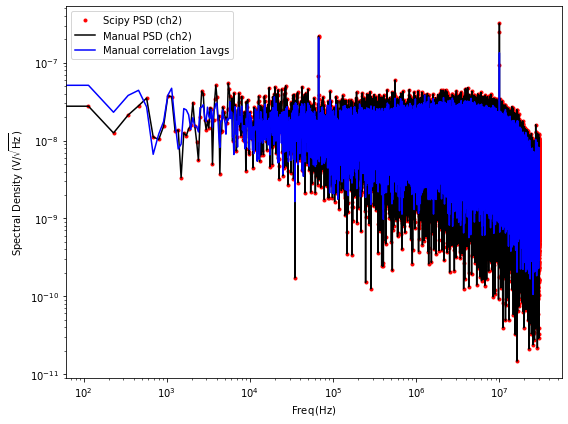

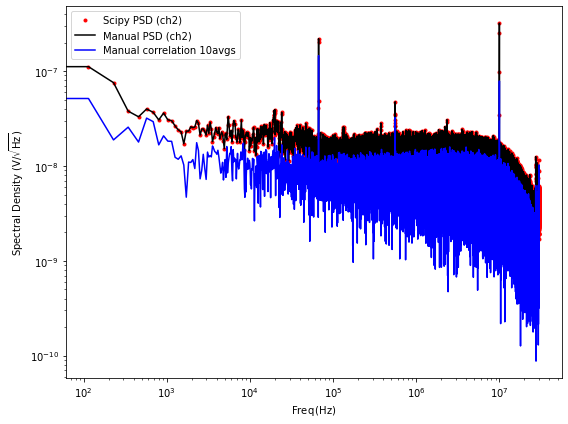

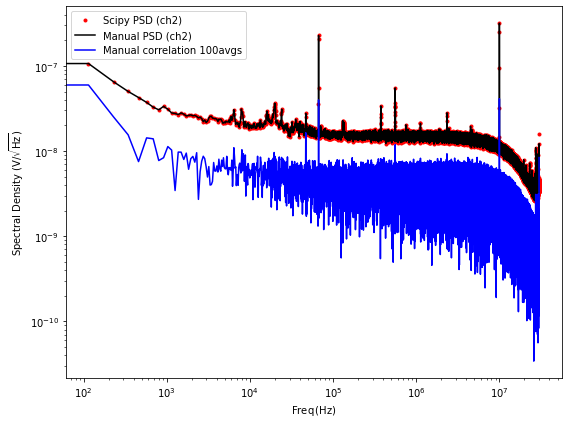

In [7]:
num_records = 1
tic = time.perf_counter()

# capture several scope shots
num_records = 20
records = [0]
timeout = 30  # [s]
start = time.time()
progress = 0

for n in range (1, repeats+1):
    """
    Begin cross-correlation measurements
    """

    
    print(f'Correlation number : {n}')
    daq.sync()

    # Wait until the Scope Module has received and processed the desired number of records.
    data_fft = ['0', '0']
    
    while (wave_nodepath_master not in data_fft) or (wave_nodepath_slave not in data_fft):
        scopeModule.execute()
        while ((records[0] < num_records) or (progress < 1.0)):
        #while ((records[0] < num_records) or (records[1] < num_records) or (progress < 1.0)):
            time.sleep(0.5)
            records = scopeModule.get('scopeModule/records')['records']
            progress = scopeModule.progress()[0]
            
            if (time.time() - start) > timeout:
                print("\nScope Module did not return {} records after {} s - forcing stop.".format(num_records, timeout))
                break
        # Read out the scope data from the module.
        data_fft = scopeModule.read(True)
        
        assert wave_nodepath_master in data_fft, "The Scope Module did not return data for {}.".format(wave_nodepath_master)
        assert wave_nodepath_slave in data_fft, "The Scope Module did not return data for {}.".format(wave_nodepath_slave)
        
    wave_master = data_fft[wave_nodepath_master][0][0]['wave'][0]
    wave_slave = data_fft[wave_nodepath_slave][0][0]['wave'][0]
    
    data = [wave_master, wave_slave]
    
    # Normalize data?
    data[0] = data[0]-np.mean(data[0])
    data[1] = data[1]-np.mean(data[1])
    
    # Calculate PSD
    fft_np_0 = signal.welch(data[0], fs=clockbase/2**sample_rate, nperseg=scope_length, scaling = "density")
    fft_np_1 = signal.welch(data[1], fs=clockbase/2**sample_rate, nperseg=scope_length, scaling = "density")
    
    # Calculate FFT
    data_fft_0 = 2*np.fft.fft(signal.windows.hann(len(data[0]))*(data[0]), norm=None)/ len(data[0]) #fft of channel 1
    data_fft_1 = 2*np.fft.fft(signal.windows.hann(len(data[1]))*(data[1]), norm=None)/ len(data[1])  #fft of channel 2
    
    if n == 1: 
        # Store first PSD signals
        fft_np_0_sum = fft_np_0[1]
        fft_np_1_sum = fft_np_1[1]
        
        # Store first FFT signals
        data_fft_0_sum = data_fft_0 
        data_fft_1_sum = data_fft_1 
        
        # Store correlated FFT signal
        corr_fft = np.multiply(data_fft_0, np.conj(data_fft_1))
        
        # Compare data_psd_0 and fft_np_0_sum to check if PSDs are equal?
        data_psd_0 = 2*np.multiply(data_fft_0, np.conj(data_fft_0))[:int(len(data_fft_0)/2)] / step # calculate PSD for chan 1
        data_psd_1 = 2*np.multiply(data_fft_1, np.conj(data_fft_1))[:int(len(data_fft_1)/2)] / step # calculate PSD for chan 2
        
    else: 
        fft_np_0_sum = fft_np_0_sum + fft_np_0[1]
        fft_np_1_sum = fft_np_1_sum + fft_np_1[1]

        data_fft_0_sum = data_fft_0_sum + data_fft_0 # sum ffts
        data_fft_1_sum = data_fft_1_sum + data_fft_1 # sum ffts
        
        corr_fft = corr_fft + np.multiply(data_fft_0, np.conj(data_fft_1)) # sum correlated fft with newly calculated correlated fft
        
        data_psd_0 = data_psd_0 + 2*np.multiply(data_fft_0, np.conj(data_fft_0))[:int(len(data_fft_0)/2)] / step 
        data_psd_1 = data_psd_1 + 2*np.multiply(data_fft_1, np.conj(data_fft_1))[:int(len(data_fft_1)/2)] / step
    
    
    if n in counter:
        manual_corr = np.sqrt(2*np.sqrt(np.multiply(corr_fft/float(n), 
                                        np.conj(corr_fft/float(n)))[:int(len(corr_fft)/2)+1])/ step / hann_scaling)

        
        np.savetxt(newDir + '\data_fft_np_0_' + str(n) + '.dat', np.vstack((fft_np_0[0], np.sqrt(fft_np_0_sum/float(n)))).T, delimiter = ',')
        np.savetxt(newDir + '\data_fft_np_1_' + str(n) + '.dat', np.vstack((fft_np_1[0], np.sqrt(fft_np_1_sum/float(n)))).T, delimiter = ',')
        
        np.savetxt(newDir + '\data_corr_fft_' + str(n) + '.dat', np.vstack((np.arange(0,stop+step,step),manual_corr.real)).T, delimiter = ',')
        
        np.savetxt(newDir + '\data_PSDM0_' + str(n) + '.dat', np.vstack((np.arange(0,stop,step),np.sqrt((data_psd_0.real)/float(n)/hann_scaling))).T, delimiter = ',')
        np.savetxt(newDir + '\data_PSDM1_' + str(n) + '.dat', np.vstack((np.arange(0,stop,step),np.sqrt((data_psd_1.real)/float(n)/hann_scaling))).T, delimiter = ',')
        
        ## Plots and saves figure
        
        mpl.rcParams['text.usetex']=False
        mpl.rcParams['text.latex.unicode']=False
        
        fig, ax = plt.subplots(figsize=(8,6))
        
        

        ax.loglog(fft_np_1[0], np.sqrt(fft_np_1_sum/float(n)), 'r.', label = 'Scipy PSD (ch2)') #scipy fft chan 1
        ax.loglog(np.arange(0,stop,step), np.sqrt((data_psd_1)/float(n)/hann_scaling), 'k', label = 'Manual PSD (ch2)')
        ax.loglog(np.arange(0,stop+step,step), manual_corr.real, 'b', label = 'Manual correlation ' + str(n) + 'avgs')
        ax.set_xlabel(r'$\mathrm{Freq}\,\mathrm{(Hz)}$')
        ax.set_ylabel(r'Spectral Density $\mathrm{(V/\sqrt{Hz})}$')
        ax.legend()
        plt.tight_layout()
        plt.savefig(newDir + "\\" + str(n) + '.png')
        
toc = time.perf_counter()


print('Time taken in seconds outer loop: ', toc-tic)

# Stop the module; to use it again we need to call execute().
daq.setInt('/%s/scopes/0/enable' % master_id, 0)
daq.setInt('/%s/scopes/0/enable' % slave_id, 0)

scopeModule.finish()